In [1]:
# importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# load the dataset
d_f=pd.read_csv(r"C:\Users\Asus\Downloads\crime_data.csv")
d_f

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [4]:
#normalized data frame comnsidering the numerical  part of the data

In [6]:
d_f_norm = norm_func(d_f.iloc[:,1:])

In [7]:
d_f_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [8]:
d_f.shape

(50, 5)

In [9]:
d_f.axes

[RangeIndex(start=0, stop=50, step=1),
 Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')]

In [10]:
new_df=d_f.rename({"Unnamed: 0":"country"},axis=1)
new_df

,country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [11]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x=stdscaler.fit_transform(new_df.iloc[:,1:])

In [12]:
new_df.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [13]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Herirchical clustering

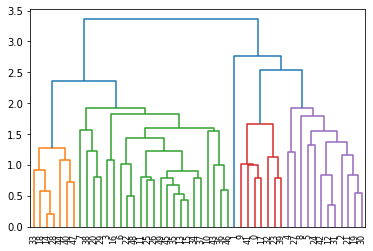

In [14]:
dendrogram=sch.dendrogram(sch.linkage(x,method='average'))

In [16]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
# from above dendogram we have got n_clusters

In [ ]:
#save cluster for chart

In [17]:
y_hc=hc.fit_predict(x)
y_hc

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
new_df["h_clust"]=y_hc

In [19]:
new_df

,country,Murder,Assault,UrbanPop,Rape,h_clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [20]:
new_df.sort_values("h_clust")

,country,Murder,Assault,UrbanPop,Rape,h_clust
24,Missouri,9.0,178,70,28.2,0
48,Wisconsin,2.6,53,66,10.8,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
29,New Jersey,7.4,159,89,18.8,0
33,North Dakota,0.8,45,44,7.3,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [21]:
from sklearn import metrics
metrics.silhouette_score(x,y_hc,metric="euclidean")

0.36924314190439733

In [22]:
from sklearn.cluster import DBSCAN

# DBSCAN

In [23]:
#building the model
dbscan=DBSCAN(eps=2,min_samples=6)#min samples=dimensions+1 i.e in this dataset we have 6 dimensions so we take 5+1=6
dbscan.fit(x)

DBSCAN(eps=2, min_samples=6)

In [24]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [25]:
new_df["clusterid_dbscan"]=dbscan.labels_

In [26]:
new_df

,country,Murder,Assault,UrbanPop,Rape,h_clust,clusterid_dbscan
0,Alabama,13.2,236,58,21.2,1,0
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,2,0
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,2,0
5,Colorado,7.9,204,78,38.7,2,0
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,2,0
9,Georgia,17.4,211,60,25.8,1,0


<AxesSubplot: >

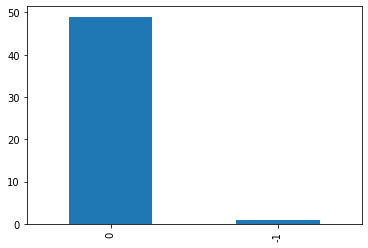

In [27]:
new_df["clusterid_dbscan"].value_counts().plot(kind="bar")

In [28]:
from sklearn  import metrics
metrics.silhouette_score(x,dbscan.labels_,metric="euclidean")#(standardized_input,modelsarray_,metric="euclidean")

0.23455598753159795

## Question 02


In [29]:
 # importing the libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [30]:
# load the dataset
df=pd.read_excel(r"C:\Users\Asus\Downloads\EastWestAirlines (1).xlsx",sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [31]:
d_f=df.drop(["Award?"], axis=1)
d_f

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,3,41354,0,1,1,1,4123,4,0,0,7034
3,4,14776,0,1,1,1,500,1,0,0,6952
4,5,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403
3995,4018,64385,0,1,1,1,981,5,0,0,1395
3996,4019,73597,0,3,1,1,25447,8,0,0,1402
3997,4020,54899,0,1,1,1,500,1,500,1,1401


In [32]:
d_f.shape

(3999, 11)

In [33]:
d_f[d_f.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll


In [34]:
df1=d_f.drop_duplicates()
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,3,41354,0,1,1,1,4123,4,0,0,7034
3,4,14776,0,1,1,1,500,1,0,0,6952
4,5,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403
3995,4018,64385,0,1,1,1,981,5,0,0,1395
3996,4019,73597,0,3,1,1,25447,8,0,0,1402
3997,4020,54899,0,1,1,1,500,1,500,1,1401


In [35]:
df1[df1.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll


In [36]:
df1.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [37]:
# from sklearn processing import standardscaler
#stdscaler=Standardscaler()
#x=stdscaler.fit_transform(df1)standardscaler is applied on columns , while normalize is applied on rows


In [38]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)# while normalizer is applied on rows

In [39]:
norm_df=norm_func(df1)
norm_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [40]:
#x

# herirchical clustering 

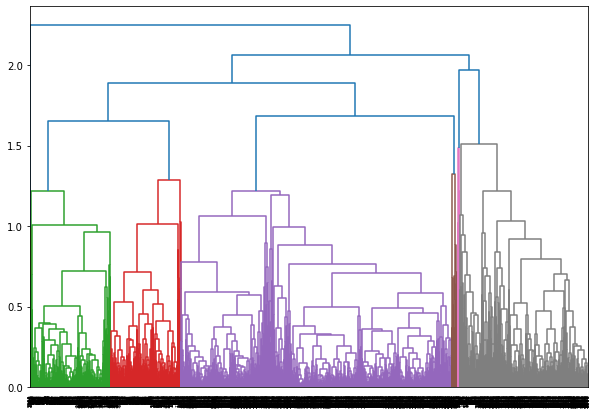

In [41]:
# create dendrograms
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(norm_df,method='complete'))

In [42]:
#create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
#from above dendogram we have got n_clusters=3

In [43]:
y_hc=hc.fit_predict(norm_df)

In [44]:
y_hc

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [45]:
df1["h_clust"]=y_hc

In [46]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clust
0,1,28143,0,1,1,1,174,1,0,0,7000,2
1,2,19244,0,1,1,1,215,2,0,0,6968,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,2
3,4,14776,0,1,1,1,500,1,0,0,6952,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,2


In [47]:
df1["h_clust"].info

<bound method Series.info of 0       2
1       2
2       2
3       2
4       2
       ..
3994    2
3995    2
3996    2
3997    2
3998    2
Name: h_clust, Length: 3999, dtype: int64>

<AxesSubplot: >

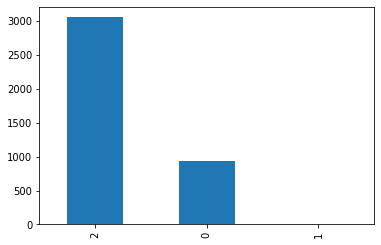

In [48]:
df1["h_clust"].value_counts().plot(kind="bar")

In [49]:
from sklearn import metrics
metrics.silhouette_score(norm_df,y_hc,metric="euclidean")

0.29423099359492466

# k means

In [50]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clust
0,1,28143,0,1,1,1,174,1,0,0,7000,2
1,2,19244,0,1,1,1,215,2,0,0,6968,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,2
3,4,14776,0,1,1,1,500,1,0,0,6952,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,2


In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df1)

KMeans(n_clusters=2)

In [53]:
kmeans.cluster_centers_

array([[2.07627126e+03, 5.13562868e+04, 1.26292803e+02, 1.96810251e+00,
        1.01499455e+00, 1.01254089e+00, 1.49766412e+04, 1.09364776e+01,
        3.89558615e+02, 1.15076336e+00, 4.00161723e+03, 1.57224646e+00],
       [1.33383686e+03, 3.20111326e+05, 3.41607251e+02, 3.07250755e+00,
        1.00906344e+00, 1.00906344e+00, 4.11719637e+04, 1.89758308e+01,
        1.24127492e+03, 3.84290030e+00, 5.41446224e+03, 1.06646526e+00]])

In [54]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
kmeans.inertia_

20828852096147.36

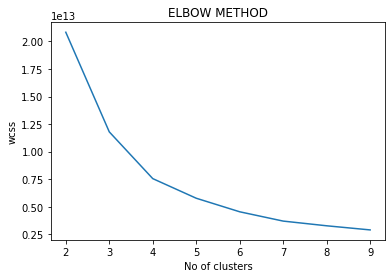

In [56]:
wcss=[]
for i in range (2,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(2,10),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()


In [57]:
##from above we get elbow point at 4i.e k value(no.of clusters)=4
from sklearn.cluster import KMeans
clust_new=KMeans(3)
clust_new.fit(norm_df)

KMeans(n_clusters=3)

In [58]:
clust_new.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [59]:
clust_new.n_iter_

7

In [60]:
clust_new.inertia_

467.5435584481129

In [61]:
# assign clusterto dataset
df1["kmeans"]=clust_new.labels_ # used to add column to dataset


In [62]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clust,kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,2,1
1,2,19244,0,1,1,1,215,2,0,0,6968,2,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,2,1
3,4,14776,0,1,1,1,500,1,0,0,6952,2,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,2,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,2,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,2,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,2,0
